<a href="https://colab.research.google.com/github/vinisasaki/titanic-descriptive-analysis/blob/main/titanic_descriptive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Descriptive Statistics

Exploratory analysis of the Titanic dataset from **Kaggle** using descriptive statistics (central tendency, dispersion, skewness, and kurtosis) along with visualizations (histograms, boxplots) to explore age, fares, social class, and their interrelationships.

## Initial Analysis

Importing libraries and loading the dataset

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("train.csv")

Displaying the first 5 rows of the dataset to get a quick overview:

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Inspecting the columns and the type of variable in each one:


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Below is a description of what each column in the dataset represents:

* **PassengerId**: Unique identifier for each passenger
* **Survived**: Survival indicator, 0 = did not survive, 1 = survived
* **Pclass**: Passenger's cabin class (socioeconomic status)
* **Name**: Full name of the passenger, including title (Mr, Mrs, Miss, etc.)
* **Sex**: Passenger’s sex
* **Age**: Age in years
* **SibSp**: Number of siblings and spouses aboard
* **Parch**: Number of parents and children aboard
* **Ticket**: Ticket number
* **Fare**: Fare paid by the passenger (in historical British pounds)
* **Cabin**: Cabin number or code assigned
* **Embarked**: Port of embarkation — C = Cherbourg, Q = Queenstown, S = Southampton

Checking for missing (null) values in the dataset:

In [57]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


It is noticeable that the columns "Age", "Cabin", and "Embarked" contain missing values

## Measures of Central Tendency

Calculating measures such as mean, median, and mode for columns with continuous numerical variables (in this dataset, the `Age` column contains values of type `float`)

In [58]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()

print("---- Age ----")
print(f"Mean: {mean_age:.2f} years\nMedian: {median_age:.2f} years")
print("---- Fare ----")
print(f"Mean: £{mean_fare:.2f}\nMedian: £{median_fare:.2f}")

---- Age ----
Mean: 29.70 years
Median: 28.00 years
---- Fare ----
Mean: £32.20
Median: £14.45


The mean fare is significantly higher than the median, which indicates the presence of an outlier that is "pulling" the mean upwards. To analyze this, a boxplot can be used. It can also be inferred that, since the median is lower than the mean, there are only a few luxury tickets that are driving the average up


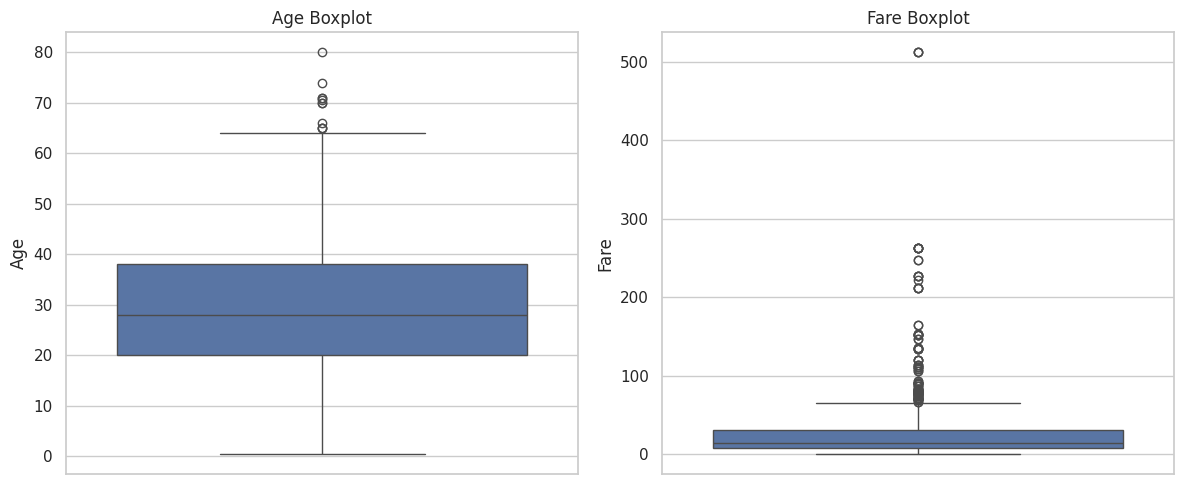

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.set_theme(style="whitegrid")

# Age Boxplot
sns.boxplot(y=df['Age'], ax=axes[0])
axes[0].set_title("Age Boxplot")
axes[0].set_ylabel("Age")

# Fare Boxplot
sns.boxplot(y=df['Fare'], ax=axes[1])
axes[1].set_title("Fare Boxplot")
axes[1].set_ylabel("Fare")

plt.tight_layout()
plt.show()

The plots above confirm the previous analysis. In the Fare boxplot, an outlier around 500 is clearly visible, which raises the mean. In the Age boxplot, although there are also outliers, they are not much higher than the upper limit of the boxplot, so they don't significantly increase the mean value

Additionally, in the case of Age, the mean is very close to the median, suggesting an almost symmetric distribution. However, in the boxplot, the upper part is slightly more extended than the lower part, which is reflected in a histogram with positive skewness, showing a tail to the right


In [60]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In the output of `df['Age'].describe()`, the 25% and 75% values correspond to the first (Q1) and third (Q3) quartiles, which define the interquartile range (IQR). This is where 50% of the passengers' ages are concentrated

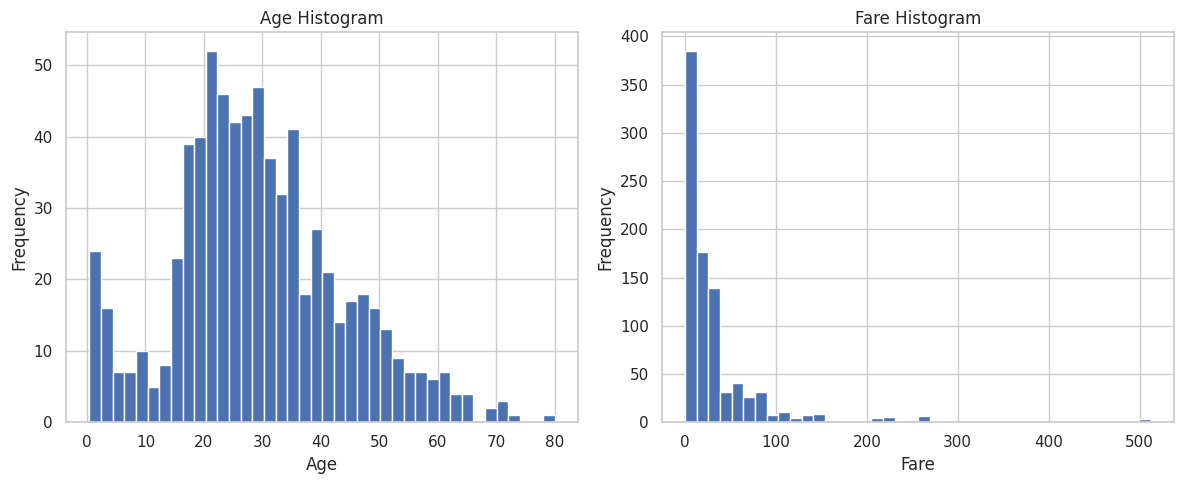

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.set_theme(style="whitegrid")

# Age Histogram
axes[0].hist(df['Age'].dropna(), bins=40)
axes[0].set_title("Age Histogram")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# Fare Histogram
axes[1].hist(df['Fare'].dropna(), bins=40)
axes[1].set_title("Fare Histogram")
axes[1].set_xlabel("Fare")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

The histograms for age and fare show positive skewness (right tail), indicating that most passengers are concentrated in the lower values, with a few outliers raising the mean above the median.

For age, the median is 28 years, with the interquartile range (Q1 to Q3) around 20 to 38 years, indicating a predominantly young passenger profile.

For fare, it’s useful to examine the percentage of passengers in each class who fall within the interquartile range (IQR), to determine which class is predominant. This can also be verified by applying the mode to the `Pclass` column

Class count within the interquartile range (IQR) of age: Pclass
3    239
2    156
1     51
Name: count, dtype: int64

Class percentage within the interquartile range (IQR) of age: Pclass
3    53.59 %
2    34.98 %
1    11.43 %
Name: proportion, dtype: object


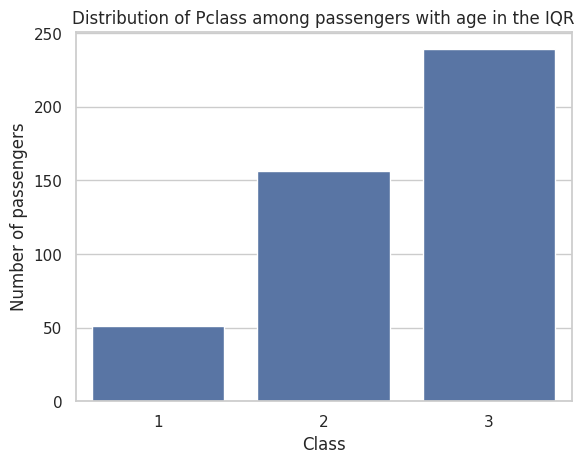

In [62]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR = df[(df['Fare'] >= Q1) & (df['Fare'] <= Q3)] # create a subset with passengers whose Fare values are between Q1 and Q2

count_IQR_Pclass = IQR['Pclass'].value_counts()
percent_IQR_Pclass  = IQR['Pclass'].value_counts(normalize=True) * 100

print(f"Class count within the interquartile range (IQR) of age: {count_IQR_Pclass}\n")
print("Class percentage within the interquartile range (IQR) of age:", percent_IQR_Pclass.round(2).astype(str) + " %")

sns.countplot(x='Pclass', data=IQR)
plt.title("Distribution of Pclass among passengers with age in the IQR")
plt.xlabel("Class")
plt.ylabel("Number of passengers")
plt.show()

It is notable that most passengers belonged to the 3rd class

In [63]:
fare_3rd = df.loc[df['Pclass'] == 3, 'Fare'] # here, the values from the Fare column are extracted only for passengers in third class

pct_3rd = (fare_3rd <= median_fare).mean() * 100

print(f"{pct_3rd:.2f}% of the fares in 3rd class are less than or equal to £{median_fare}")

71.08% of the fares in 3rd class are less than or equal to £14.4542


And more than 70% of the fares in 3rd class are below or equal to the median value, which highlights the positive skewness of the histogram

Verifying through the application of the Mode:

In [64]:
mode_Pclass = df['Pclass'].mode()
mode_Pclass

,Pclass
0,3


We can also see the number of passengers in each class:

In [65]:
count_each_class = df['Pclass'].value_counts()
count_each_class

,count
Pclass,
3,491
1,216
2,184


## Measures of Dispersion

Measures of dispersion are statistics that indicate how much the data varies or spreads around the mean (or another central point, such as the median). They help to understand the variability or consistency of a dataset

### Range

To get the total spread of the data, the Range can be used:

In [66]:
age_range = df['Age'].max() - df['Age'].min()

fare_range = df['Fare'].max() - df['Fare'].min()

print(f"Age Range: {age_range:.1f} years")
print(f"Fare Range: £{fare_range:.2f}")

Age Range: 79.6 years
Fare Range: £512.33


As can be seen, the range is sensitive to outliers. Since the Fare column contains a very large outlier, it significantly affects the range calculation

### Standard Deviation

Another measure is the standard deviation, which calculates how much each observation deviates from the mean. The higher the value, the more dispersed the data is around the mean

In [67]:
std_age  = df['Age'].std()
std_fare = df['Fare'].std()

print(f"Age Standard Deviation: {std_age:.2f} years")
print(f"Fare Standard Deviation: £{std_fare:.2f}")

Age Standard Deviation: 14.53 years
Fare Standard Deviation: £49.69


In the case of fare standard deviation, it is much higher than the median itself, meaning that, on average, each fare is nearly £50 away from the mean

### Variance

Variance measures, on average, the squared distance of each value from the mean of the dataset. It is essentially the square of the standard deviation

High variance: the data is highly spread out around the mean (many values far from it)

Low variance: the values are more tightly clustered around the mean

In [68]:
var_age  = df['Age'].var()
var_fare = df['Fare'].var()

print(f"Age variance: {var_age:.2f}")
print(f"Fare variance: {var_fare:.2f}")

Age variance: 211.02
Fare variance: 2469.44


The variance of Fare is very high because there are both very cheap and very expensive tickets, which greatly spreads the values

The variance of Age is lower, indicating that although ages vary, they do not extend as widely as the fares

### Coefficient of Variation (CV)

It is a dimensionless measure that indicates the relative dispersion of a variable around its mean. The lower the CV, the more homogeneous the values; the higher the CV, the more heterogeneous the distribution

In [69]:
cv_age  = df['Age'].std()  / df['Age'].mean()
cv_fare = df['Fare'].std() / df['Fare'].mean()

print(f"CV Age: {cv_age:.2f}")
print(f"CV Fare: {cv_fare:.2f}")

CV Age: 0.49
CV Fare: 1.54


The coefficient of variation (CV) for age is 0.49 (or 49%), which means that the standard deviation of 14.53 years corresponds to 49% of the mean age of 29.7 years. On the other hand, the CV for fares is 1.54 (or 154%), indicating that the standard deviation of £49.69 is 154% of the mean fare of £32.2

## Skewness and Kurtosis

### Skewness

Measures the degree of asymmetry of the distribution around the mean:

Skew > 0: longer tail to the right (distribution "pulled" toward higher values).

Skew < 0: longer tail to the left (pulled toward lower values).

Skew ≈ 0: approximately symmetric distribution.

In [70]:
print("Skew Age:", df['Age'].skew())
print("Skew Fare:", df['Fare'].skew())

Skew Age: 0.38910778230082704
Skew Fare: 4.787316519674893


It can be seen that the skewness of Age is slight and has a right tail, due to the presence of children and elderly passengers. On the other hand, the skewness of Fare is high, indicating that there are many cheap tickets and only a few expensive ones. This can be confirmed by the histogram

### Kurtosis

Measures the “heaviness” of the tails and the peak of the distribution compared to a normal distribution:

Kurt > 3 (excess kurtosis > 0): heavy tails and a sharper peak than the normal distribution (“leptokurtic”).

Kurt < 3 (excess kurtosis < 0): light tails and a flatter peak (“platykurtic”).

Kurt ≈ 3 (excess ≈ 0): distribution similar to the normal (“mesokurtic”).

In [71]:
print("Kurtosis Age:", df['Age'].kurtosis()) # this function already returns the value as excess kurtosis
print("Kurtosis Fare:", df['Fare'].kurtosis())

Kurtosis Age: 0.17827415364210353
Kurtosis Fare: 33.39814088089868


High kurtosis in Fare reinforces the presence of many outliers (expensive tickets) or a very sharp peak, kurtosis of Age close to zero indicates a relatively “normal” age distribution, with few extreme outliers

## Insights

**Central Tendency**

* **Age**: mean ≈ 29.7 years, median ≈ 28 years, standard deviation ≈ 14.5 years.
* **Fare**: mean ≈ £32.2, median ≈ £14.45, standard deviation ≈ £49.7.

**Skewness and Kurtosis**

* **Age** shows slight right skewness (skew ≈ 0.5) and near-normal kurtosis (excess ≈ 0.18), indicating a relatively balanced distribution from teenagers to elderly passengers.
* **Fare** is highly right-skewed (high skewness) and extremely leptokurtic (excess ≈ 33.4), due to many cheap tickets and a few luxury fares that distort the distribution.

**Interquartile Range (IQR)**

* **Age**: Q1 ≈ 20 years, Q3 ≈ 38 years (50% of passengers within this range).
* **Fare**: Q1 ≈ £7, Q3 ≈ £31 (50% of tickets within this range).

**Modes and Categorical Profiles**

* The modal class is **3rd class** (mode of Pclass), confirming that most passengers traveled in lower-cost accommodations.

**Relative Dispersion (CV)**

* **CV(age)** ≈ 0.49: moderate variation around the mean.
* **CV(fare)** ≈ 1.54: high heterogeneity, suggesting the potential need for transformation (e.g., log) in future analyses.
